In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Load the dataset
data = pd.read_csv('Urban_development_sub_system_dataset.csv')
print(data)

        ID             GDP        Date Health_Care_Facilities  \
0     7981  CA-2014-103800  03-01-2014         Standard Class   
1      740  CA-2014-112326  04-01-2014         Standard Class   
2      741  CA-2014-112326  04-01-2014         Standard Class   
3      742  CA-2014-112326  04-01-2014         Standard Class   
4     1760  CA-2014-141817  05-01-2014         Standard Class   
...    ...             ...         ...                    ...   
9989   908  CA-2017-143259  30-12-2017         Standard Class   
9990   909  CA-2017-143259  30-12-2017         Standard Class   
9991  1297  CA-2017-115427  30-12-2017         Standard Class   
9992  1298  CA-2017-115427  30-12-2017         Standard Class   
9993  5092  CA-2017-156720  30-12-2017         Standard Class   

     Infrastructure_ID               Name        Country           City  \
0             DP-13000      Darren Powers  United States        Houston   
1             PO-19195      Phillina Ober  United States     Napervil

In [3]:
print(data.head)
print(data.tail)
print(data.describe)

<bound method NDFrame.head of         ID             GDP        Date Health_Care_Facilities  \
0     7981  CA-2014-103800  03-01-2014         Standard Class   
1      740  CA-2014-112326  04-01-2014         Standard Class   
2      741  CA-2014-112326  04-01-2014         Standard Class   
3      742  CA-2014-112326  04-01-2014         Standard Class   
4     1760  CA-2014-141817  05-01-2014         Standard Class   
...    ...             ...         ...                    ...   
9989   908  CA-2017-143259  30-12-2017         Standard Class   
9990   909  CA-2017-143259  30-12-2017         Standard Class   
9991  1297  CA-2017-115427  30-12-2017         Standard Class   
9992  1298  CA-2017-115427  30-12-2017         Standard Class   
9993  5092  CA-2017-156720  30-12-2017         Standard Class   

     Infrastructure_ID               Name        Country           City  \
0             DP-13000      Darren Powers  United States        Houston   
1             PO-19195      Phillina Ob

In [4]:
data['Target'] = (data['Environmental_Impact'].shift(-1) > data['Environmental_Impact']).astype(int)

In [5]:
# Drop rows with NaN values
data.dropna(inplace=True)

In [6]:
# Gathering the Companies Strategies Information
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Environmental_Impact', 'Transportation_Values', 'Land_Use', 'Demographics']])
print(scaled_data)

[[-1.42076411 -1.41520622 -1.43856065 -1.43019485]
 [-1.42255154 -1.41305607 -1.43998601 -1.42733431]
 [-1.42219405 -1.41377279 -1.43927333 -1.42197079]
 ...
 [ 1.76478889  1.76737382  1.76137657  1.76503173]
 [ 1.76514638  1.76773218  1.76173291  1.7653893 ]
 [ 1.76550386  1.76809054  1.76208926  1.76574687]]


In [7]:
# Create features and target variable
X = scaled_data[:, :-1]
y = data['Target'].values

In [8]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
print(X_train)

[[-0.341158   -0.34371491 -0.33782501]
 [-0.88239099 -0.88626938 -0.87732445]
 [ 1.47987298  1.48176226  1.47737324]
 ...
 [ 0.11999826  0.11856729  0.12185417]
 [-1.42469645 -1.411981   -1.44034235]
 [ 0.79207094  0.79228089  0.79177421]]


In [11]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f'Decision Tree Accuracy: {dt_accuracy}')

Decision Tree Accuracy: 0.9559779889944973


In [12]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy}')

Random Forest Accuracy: 0.9639819909954978


In [13]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f'Logistic Regression Accuracy: {lr_accuracy}')

Logistic Regression Accuracy: 0.9414707353676839


In [14]:
# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'SVM Accuracy: {svm_accuracy}')

SVM Accuracy: 0.9414707353676839


In [15]:
# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
print(knn_predictions)

[1 1 1 ... 1 1 1]


In [16]:
# Neural Network using TensorFlow
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
nn_predictions = (model.predict(X_test) > 0.5).astype(int).flatten()
nn_accuracy = accuracy_score(y_test, nn_predictions)
print(f'Neural Network Accuracy: {nn_accuracy}')

Epoch 1/20
250/250 [==============================] - 1s 2ms/step - loss: 0.3318 - accuracy: 0.9321 - val_loss: 0.2155 - val_accuracy: 0.9415
Epoch 2/20
250/250 [==============================] - 0s 1ms/step - loss: 0.1732 - accuracy: 0.9435 - val_loss: 0.1469 - val_accuracy: 0.9415
Epoch 3/20
250/250 [==============================] - 0s 1ms/step - loss: 0.1312 - accuracy: 0.9435 - val_loss: 0.1271 - val_accuracy: 0.9415
Epoch 4/20
250/250 [==============================] - 0s 1ms/step - loss: 0.1180 - accuracy: 0.9435 - val_loss: 0.1168 - val_accuracy: 0.9415
Epoch 5/20
250/250 [==============================] - 1s 2ms/step - loss: 0.1127 - accuracy: 0.9435 - val_loss: 0.1175 - val_accuracy: 0.9415
Epoch 6/20
250/250 [==============================] - 1s 2ms/step - loss: 0.1082 - accuracy: 0.9435 - val_loss: 0.1105 - val_accuracy: 0.9415
Epoch 7/20
250/250 [==============================] - 0s 2ms/step - loss: 0.1064 - accuracy: 0.9435 - val_loss: 0.1078 - val_accuracy: 0.9415
Epoch 

In [17]:
# Deep Learning with Keras
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
dl_predictions = (model.predict(X_test) > 0.5).astype(int).flatten()
dl_accuracy = accuracy_score(y_test, dl_predictions)
print(f'DL Accuracy: {dl_accuracy}')

Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.2475 - accuracy: 0.9435
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.1208 - accuracy: 0.9435
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.1064 - accuracy: 0.9426
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.1027 - accuracy: 0.9452
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.0973 - accuracy: 0.9450
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.0950 - accuracy: 0.9462
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.0960 - accuracy: 0.9448
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss: 0.0943 - accuracy: 0.9448
Epoch 9/10
250/250 [==============================] - 0s 1ms/step - loss: 0.0931 - accuracy: 0.9458
Epoch 10/10
63/63 [==============================] - 0s 1ms/step
DL Accuracy: 0.9414707353676839


In [18]:
# Evaluation
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, rf_predictions))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))
print("Deep Learning Accuracy:", accuracy_score(y_test, dl_predictions))
print(f'Decision Tree Accuracy: {dt_accuracy}')
print("DL Accuracy:", accuracy_score(y_test, dl_predictions))

Random Forest Classifier Accuracy: 0.9639819909954978
Logistic Regression Accuracy: 0.9414707353676839
SVM Accuracy: 0.9414707353676839
KNN Accuracy: 0.968984492246123
Deep Learning Accuracy: 0.9414707353676839
Decision Tree Accuracy: 0.9559779889944973
DL Accuracy: 0.9414707353676839


In [19]:
# Confusion Matrix :
print("\nConfusion Matrix for #RandomForestClassifier:")
print(confusion_matrix(y_test, rf_predictions))


Confusion Matrix for #RandomForestClassifier:
[[  94   23]
 [  49 1833]]


In [20]:
# Confusion Matrix :
print("\nConfusion Matrix for #Logistic Regression :")
print(confusion_matrix(y_test, lr_predictions))


Confusion Matrix for #Logistic Regression :
[[   0  117]
 [   0 1882]]


In [21]:
# Confusion Matrix :
print("\nConfusion Matrix for #Support Vector Machine:")
print(confusion_matrix(y_test, svm_predictions))


Confusion Matrix for #Support Vector Machine:
[[   0  117]
 [   0 1882]]


In [22]:
# Confusion Matrix :
print("\nConfusion Matrix for #KNeighborsClassifier:")
print(confusion_matrix(y_test, knn_predictions))


Confusion Matrix for #KNeighborsClassifier:
[[  99   18]
 [  44 1838]]


In [23]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=54)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_test)

[[ 0.55260614  0.55221967  0.55308805]
 [ 1.19762752  1.19884278  1.19602249]
 [ 0.54220257  0.54179027  0.54271814]
 ...
 [-0.15519541 -0.1573395  -0.15242344]
 [-0.31376018 -0.31629802 -0.31047518]
 [-1.42048485 -1.41318372 -1.42613451]]


In [24]:
'''Implement and train SVM model'''
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_accuracy = svm_model.score(X_test, y_test)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.9437218609304653


In [25]:
'''Implement and train CNN model'''

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train_cnn)
print(X_test_cnn)

[[[-1.36129212]
  [-1.36643121]
  [-1.35461788]]

 [[ 0.62291993]
  [ 0.62270806]
  [ 0.62317434]]

 [[-0.09098027]
  [-0.0929649 ]
  [-0.08841606]]

 ...

 [[-1.41833239]
  [-1.40239468]
  [-1.42756484]]

 [[ 0.88408542]
  [ 0.88452209]
  [ 0.88349485]]

 [[ 0.80731425]
  [ 0.80756028]
  [ 0.80697206]]]
[[[ 0.55260614]
  [ 0.55221967]
  [ 0.55308805]]

 [[ 1.19762752]
  [ 1.19884278]
  [ 1.19602249]]

 [[ 0.54220257]
  [ 0.54179027]
  [ 0.54271814]]

 ...

 [[-0.15519541]
  [-0.1573395 ]
  [-0.15242344]]

 [[-0.31376018]
  [-0.31629802]
  [-0.31047518]]

 [[-1.42048485]
  [-1.41318372]
  [-1.42613451]]]


In [26]:
# Step 6: Visualize the results
# Assuming you have predictions from both models
svm_predictions = svm_model.predict(X_test)
print(svm_predictions)

[1 1 1 ... 1 1 1]


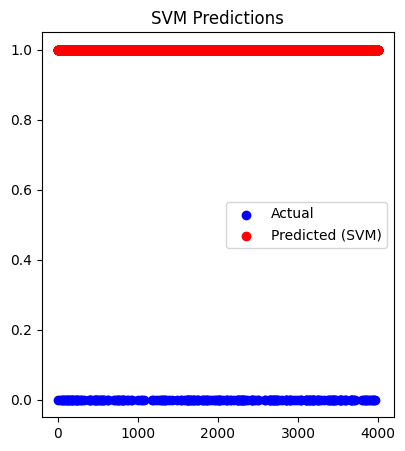

In [27]:
# Plotting SVM predictions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue')
plt.scatter(range(len(svm_predictions)), svm_predictions, label='Predicted (SVM)', color='red')
plt.title('SVM Predictions')
plt.legend()

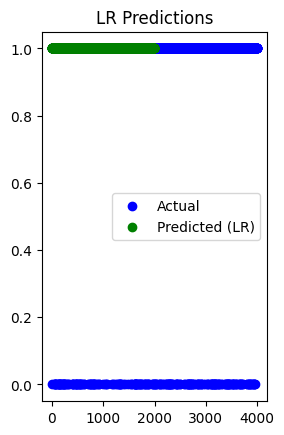

In [28]:
# Plotting LR predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue')
plt.scatter(range(len(lr_predictions)), lr_predictions, label='Predicted (LR)', color='green')
plt.title('LR Predictions')
plt.legend()
plt.show()

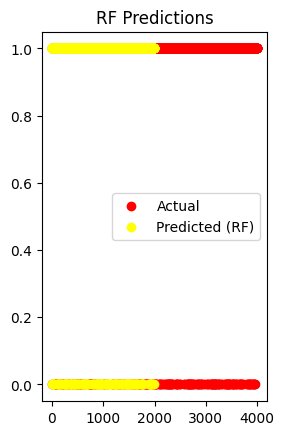

In [29]:
# Plotting RF predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='red')
plt.scatter(range(len(rf_predictions)), rf_predictions, label='Predicted (RF)', color='yellow')
plt.title('RF Predictions')
plt.legend()
plt.show()

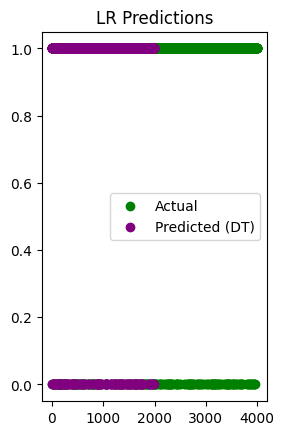

In [30]:
# Plotting DT predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='green')
plt.scatter(range(len(dt_predictions)), dt_predictions, label='Predicted (DT)', color='purple')
plt.title('LR Predictions')
plt.legend()
plt.show()

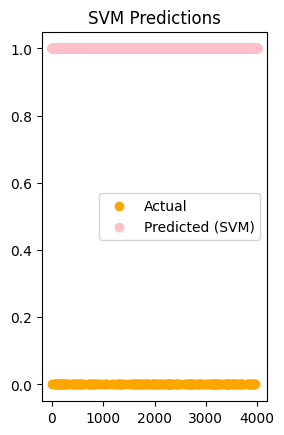

In [31]:
# Plotting SVM predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='orange')
plt.scatter(range(len(svm_predictions)), svm_predictions, label='Predicted (SVM)', color='pink')
plt.title('SVM Predictions')
plt.legend()
plt.show()

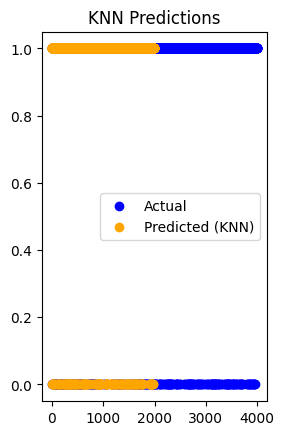

In [32]:
# Plotting KNN predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue')
plt.scatter(range(len(knn_predictions)), knn_predictions, label='Predicted (KNN)', color='orange')
plt.title('KNN Predictions')
plt.legend()
plt.show()

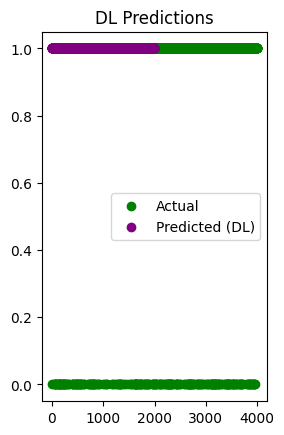

In [33]:
# Plotting DL predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='green')
plt.scatter(range(len(dl_predictions)), dl_predictions, label='Predicted (DL)', color='purple')
plt.title('DL Predictions')
plt.legend()
plt.show()